In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt

## statsmodels의 정규화 회귀모형

In [6]:
def make_nonlinear(seed=0):
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2 * np.pi * X) + np.random.randn(n_samples)*0.1
    X = X[:, np.newaxis]
    return (X, y)

X, y = make_nonlinear()
dfX = pd.DataFrame(X, columns=['x'])
dfX = sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=['y'])
df = pd.concat([dfX, dfy], axis=1)

In [8]:
model = sm.OLS.from_formula(
    'y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) +  I(x**6) + I(x**7) + I(x**8) + I(x**9)', data=df)
result1 = model.fit()
result1.params

Intercept       -0.169863
x               25.735773
I(x ** 2)     -428.141684
I(x ** 3)     3866.723115
I(x ** 4)   -18340.939666
I(x ** 5)    49326.072549
I(x ** 6)   -78884.743079
I(x ** 7)    74538.645158
I(x ** 8)   -38453.132193
I(x ** 9)     8350.254986
dtype: float64

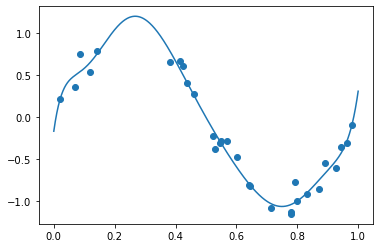

In [12]:
def plot_statsmodels(result):
    plt.scatter(X, y)
    xx = np.linspace(0, 1, 1000)
    dfxx = pd.DataFrame(xx, columns=['x'])
    dfxx = sm.add_constant(dfxx)
    plt.plot(xx, result.predict(dfxx).values)
    plt.show()
    
plot_statsmodels(result1)

### L1_wt = 0 , 순수 Ridge 모형

[ 0.63308745 -0.75705866 -1.07056551 -0.76835135 -0.35530367  0.0121939
  0.29917825  0.50969248  0.65793698  0.75851865]


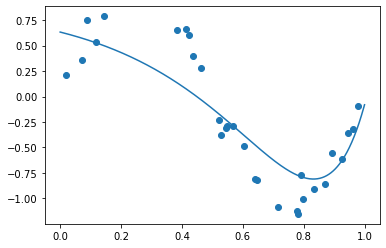

In [13]:
result2 = model.fit_regularized(alpha=0.01, L1_wt=0)
print(result2.params)
plot_statsmodels(result2)

### L1_wt  = 1, Lasso 모형 

Intercept    0.687949
x           -1.129134
I(x ** 2)   -1.124878
I(x ** 3)    0.000000
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.000000
I(x ** 8)    0.281484
I(x ** 9)    1.075281
dtype: float64


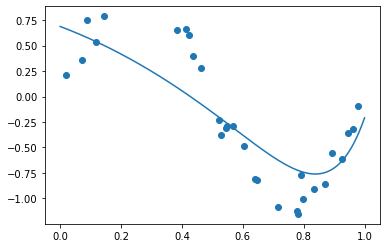

In [14]:
result3 = model.fit_regularized(alpha=0.01, L1_wt=1)
print(result3.params)
plot_statsmodels(result3)

### 0 < L1_wt  < 1 , Elastic Net 모형

Intercept    0.643465
x           -0.710209
I(x ** 2)   -1.162427
I(x ** 3)   -0.821070
I(x ** 4)   -0.326020
I(x ** 5)    0.003269
I(x ** 6)    0.327743
I(x ** 7)    0.547024
I(x ** 8)    0.681195
I(x ** 9)    0.751854
dtype: float64


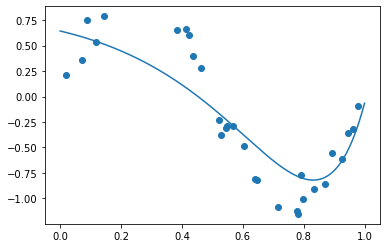

In [15]:
result4 = model.fit_regularized(alpha=0.01, L1_wt=0.05)
print(result4. params)
plot_statsmodels(result4)

## Scikit-Learn의 정규화 회귀모형

In [20]:
def plot_sklearn(model):
    plt.scatter(X, y)
    xx = np.linspace(0, 1, 1000)
    plt.plot(xx, model.predict(xx[:, np.newaxis]))
    plt.grid('True')
    plt.show()

[ 0.00000000e+00  2.57357731e+01 -4.28141683e+02  3.86672311e+03
 -1.83409397e+04  4.93260725e+04 -7.88847431e+04  7.45386451e+04
 -3.84531322e+04  8.35025498e+03]


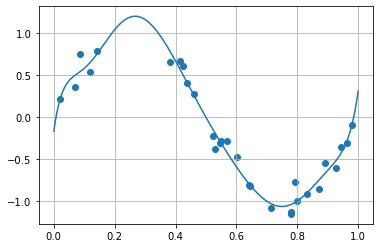

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

poly = PolynomialFeatures(9)    # 다항회귀
model = make_pipeline(poly, LinearRegression()).fit(X, y) 
# 선형회귀 모델을 만들고, 다항화한 x의 데이터와 기존의 y값을 모델에 fit
print(model.steps[1][1].coef_)
plot_sklearn(model)

### Ridge

[ 0.          1.51430399 -3.90160797 -2.6359859  -0.41526792  1.07530175
  1.64913273  1.52026782  0.94651401  0.13299614]


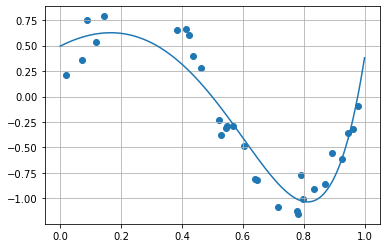

In [22]:
model = make_pipeline(poly, Ridge(alpha=0.01)).fit(X, y)
print(model.steps[1][1].coef_)
plot_sklearn(model)

### Lasso

[ 0.         -0.07668852 -2.44096313 -0.         -0.          0.
  0.          0.          0.          1.88188725]


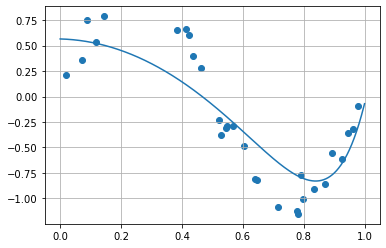

In [23]:
model = make_pipeline(poly, Lasso(alpha=0.01)).fit(X, y)
print(model.steps[1][1].coef_)
plot_sklearn(model)

### ElasticNet

[ 0.         -0.83768018 -1.23944649 -0.50166684 -0.          0.
  0.          0.30382246  0.62459231  0.84262899]


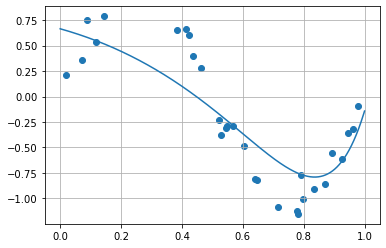

In [24]:
model = make_pipeline(poly, ElasticNet(alpha=0.01)).fit(X, y)
print(model.steps[1][1].coef_)
plot_sklearn(model)